Libraries

In [87]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.preprocessing import RobustScaler
from collections import Counter
import matplotlib.patches as mpatches
import time

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import collections


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
import warnings
warnings.filterwarnings('ignore')


Loading Dataset

In [5]:
df = pd.read_csv('dataset/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

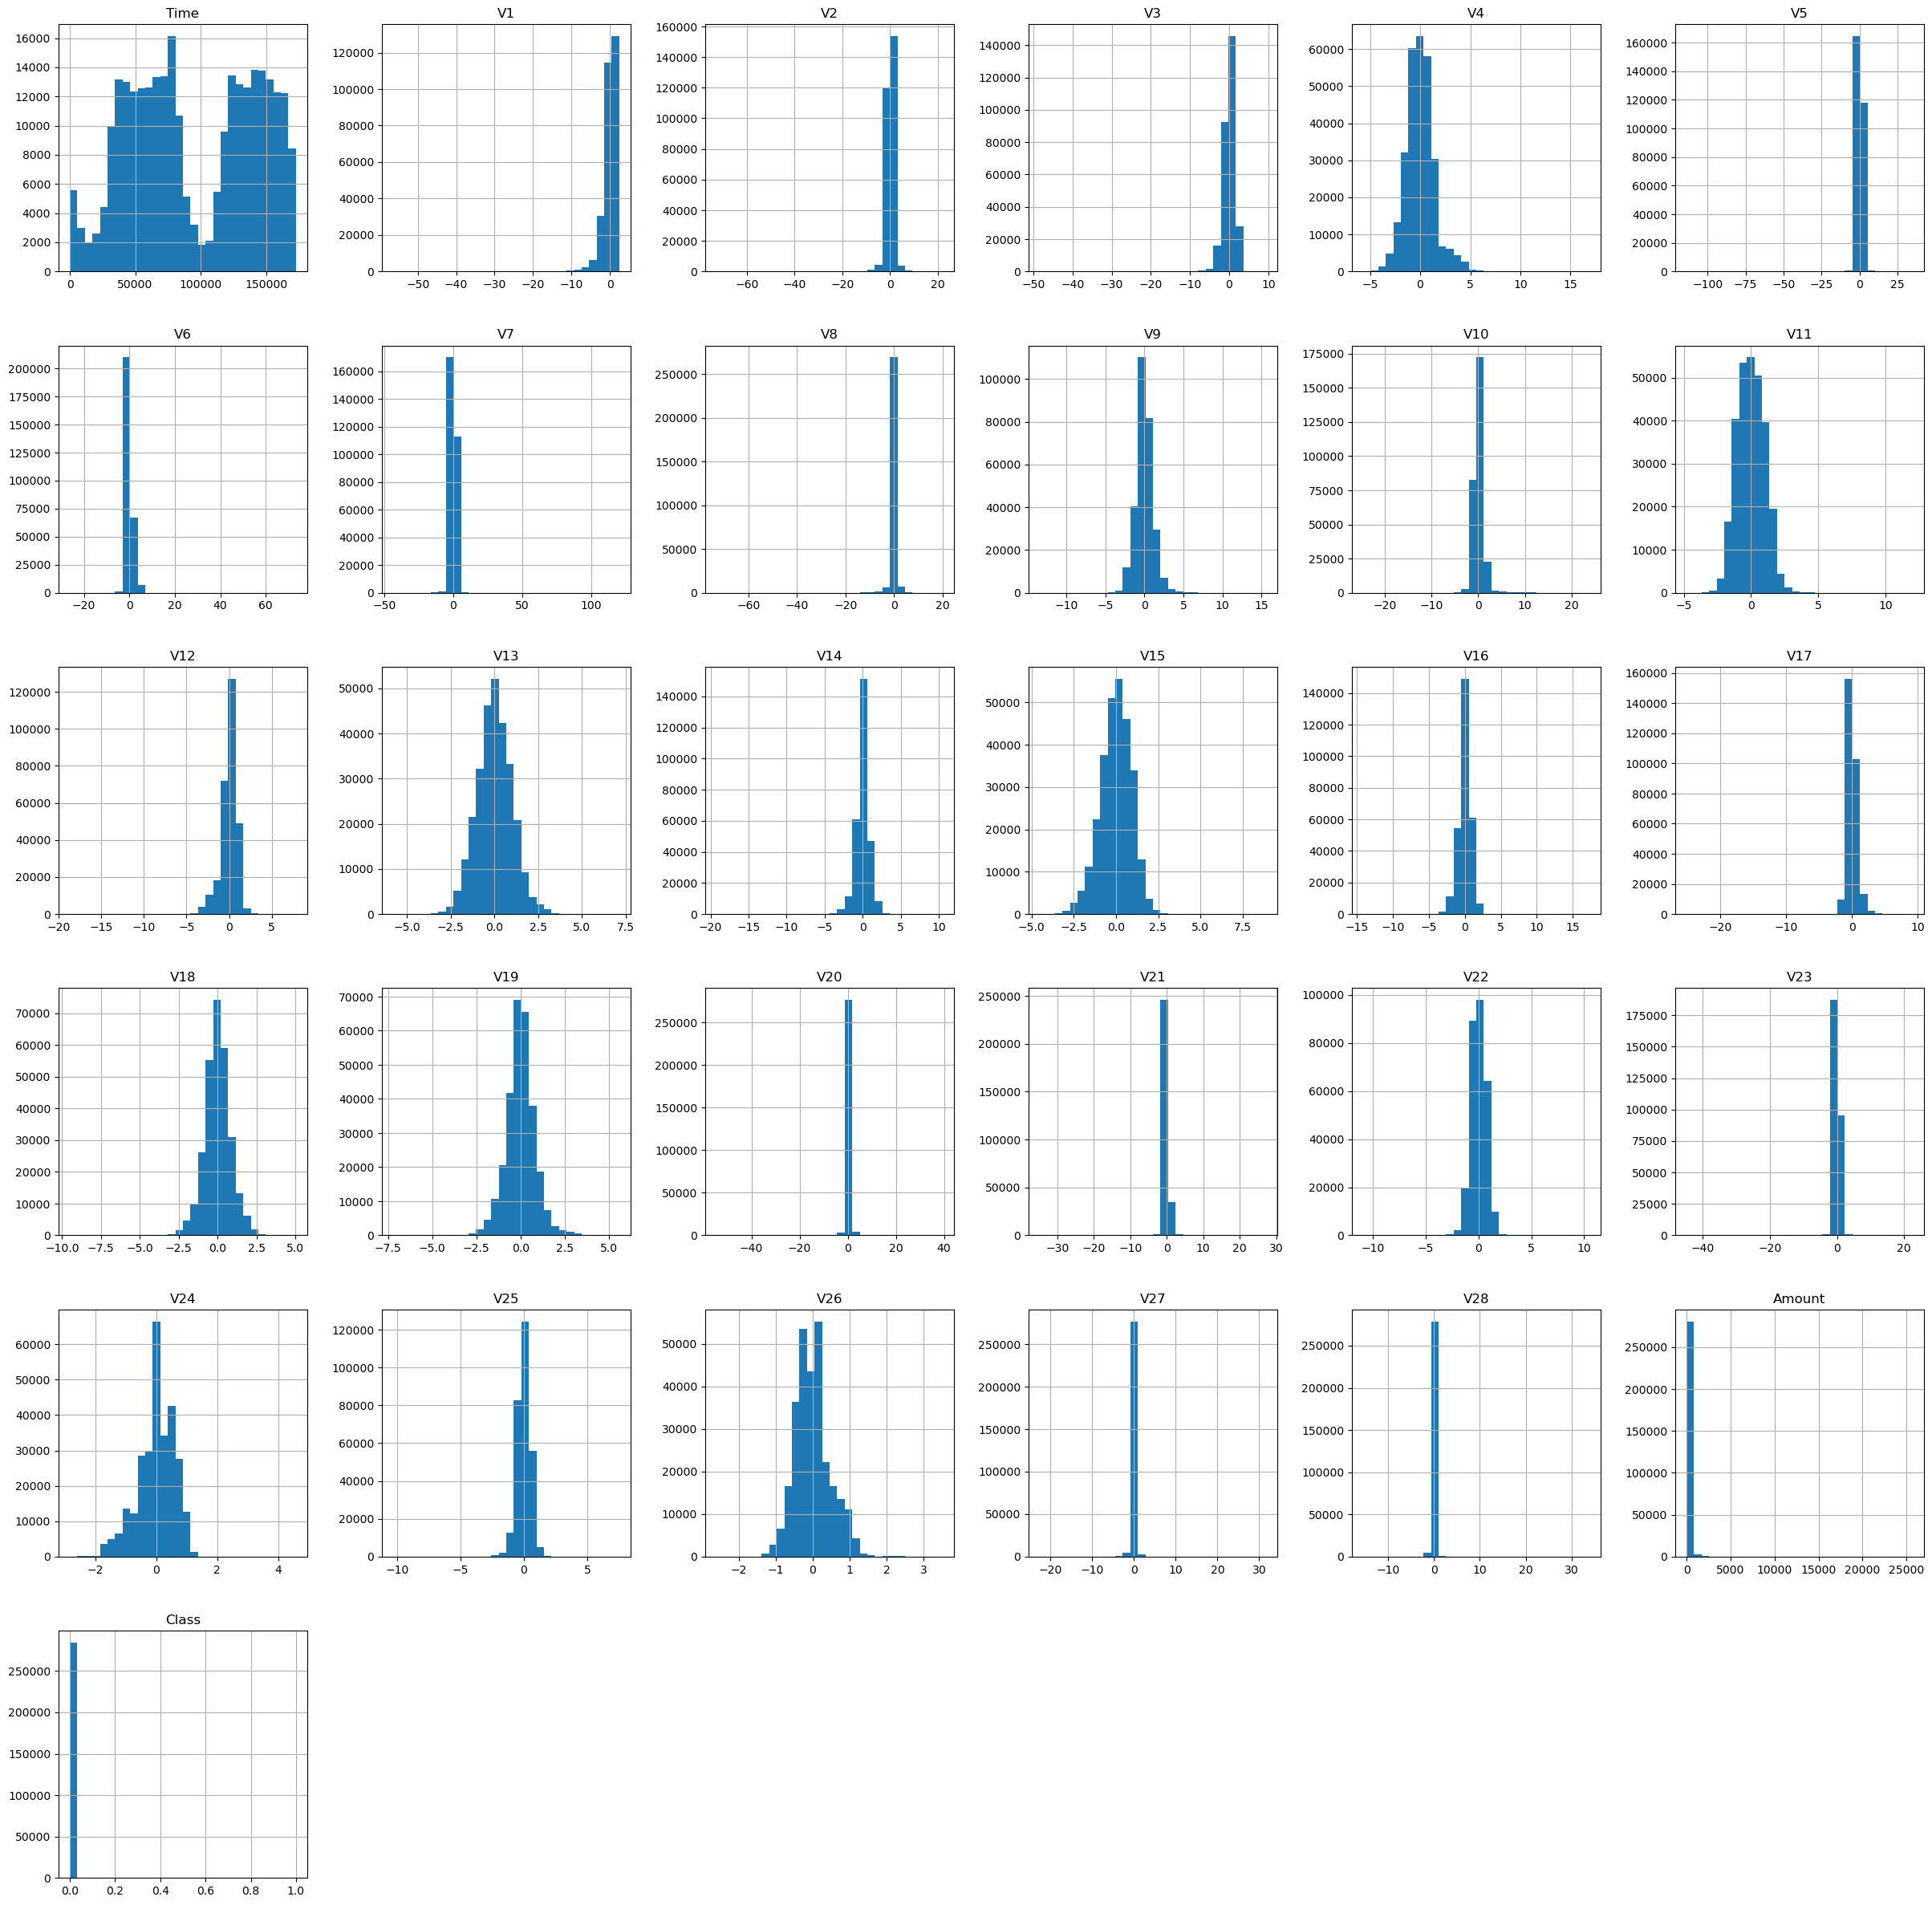

In [8]:
df.hist(bins = 30, figsize =(30,30))

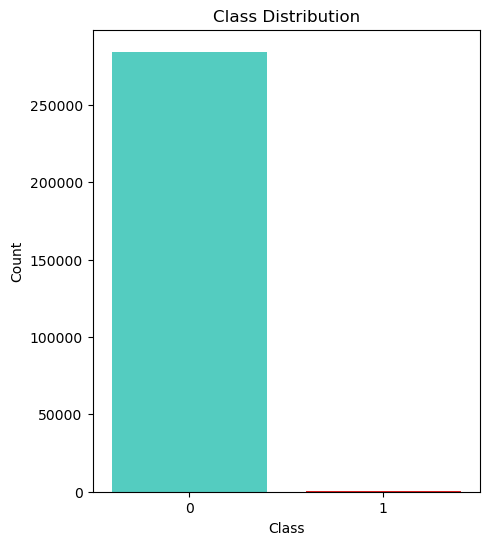

In [9]:
colors = ['turquoise', 'red']
plt.figure(figsize = (5, 6))
sns.countplot(x = 'Class', data = df, palette = colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Checking Missing Values

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Distributions

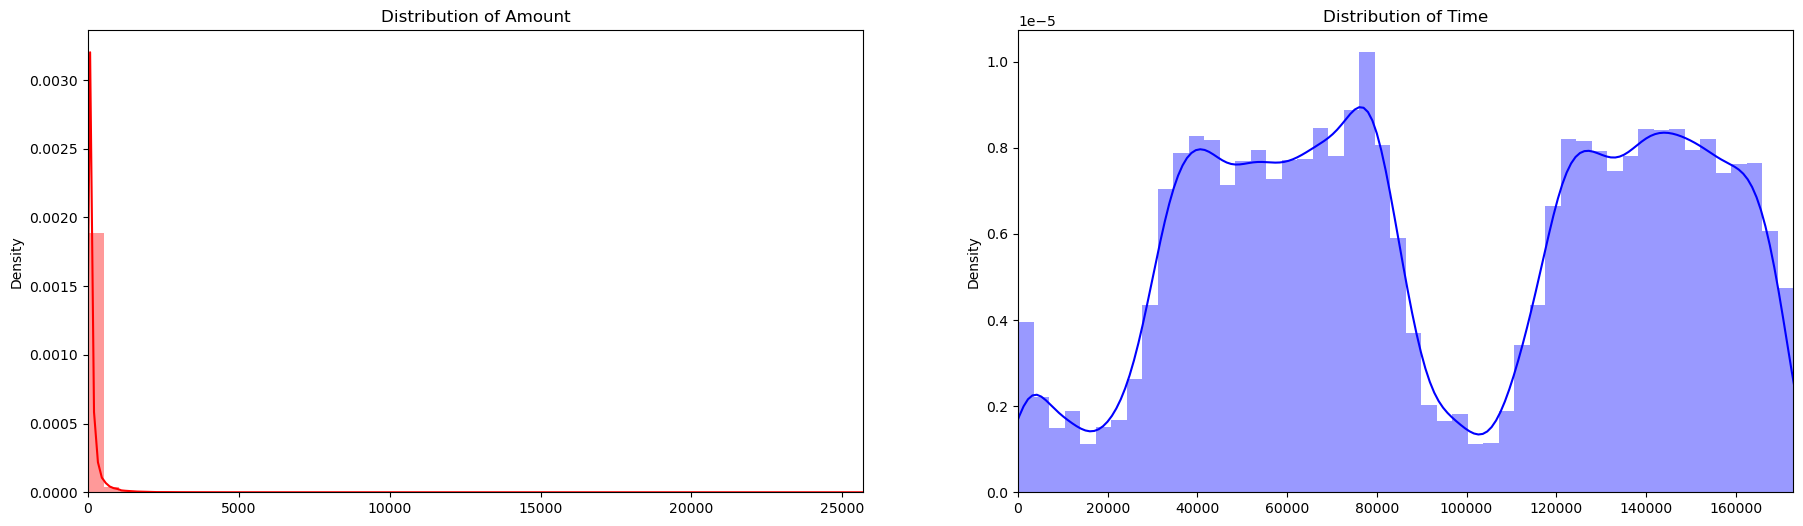

In [13]:
fig, ax = plt.subplots(1, 2, figsize =(22, 6))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax = ax[0], color = 'r')
ax[0].set_title('Distribution of Amount', fontsize = 12)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax = ax[1], color = 'b')
ax[1].set_title('Distribution of Time', fontsize = 12)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Spliting the data

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

scaled_df = df.copy()

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

    rob_scaler = RobustScaler()
    # Fit the scaler on the training data
    rob_scaler.fit(original_Xtrain)

    # Transform both training and test data
    original_Xtrain_scaled = rob_scaler.transform(original_Xtrain)
    original_Xtest_scaled = rob_scaler.transform(original_Xtest)

    # Update the original DataFrame with the scaled values
    scaled_df.iloc[train_index, scaled_df.columns.get_indexer(X.columns)] = original_Xtrain_scaled
    scaled_df.iloc[test_index, scaled_df.columns.get_indexer(X.columns)] = original_Xtest_scaled

    # Check the distribution of the labels
    train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
    test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
    print('-' * 100)
    print('Label Distributions: \n')
    print(train_counts_label / len(original_ytrain))
    print(test_counts_label / len(original_ytest))

# Insert the scaled attributes into the original DataFrame
df['scaled_amount'] = scaled_df['Amount']
df['scaled_time'] = scaled_df['Time']

# Drop the original columns if no longer needed
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder the columns if necessary
scaled_amount = df.pop('scaled_amount')
scaled_time = df.pop('scaled_time')
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827514 0.00172486]
[0.998262 0.001738]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827514 0.00172486]
[0.998262 0.001738]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
--------------------------------------------------------------

Random Under-Sampling

In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples

df = df.sample(frac = 1)

fraud_df = df.loc[df['Class'] == 1]
valid_df = df.loc[df['Class'] == 0][:492]
normal_dist_df = pd.concat([fraud_df,valid_df])

# Shuffle dataframe rows
new_df = normal_dist_df.sample(frac = 1, random_state = 42)
new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
254396,-0.113596,1.147833,2.189292,-0.663296,-1.418668,-1.096806,-0.233084,-0.692229,-0.389778,-0.254238,...,0.075369,0.493695,1.421238,0.000954,0.853217,0.223169,0.009137,-0.041107,-0.065917,0
27738,1.377146,-0.530627,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,...,0.513530,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1
153453,0.051426,0.355720,-1.625976,1.120456,-1.200966,-0.094891,0.857524,-0.807471,0.665731,-0.318427,...,-0.620093,0.091021,0.916497,0.076183,-0.597676,-0.335938,-0.271182,-0.956015,0.082246,0
41943,-0.306055,-0.445237,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,...,1.725578,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,1
141259,6.606906,0.150512,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83053,-0.231585,-0.186962,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,...,0.222667,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,1
79525,-0.302811,-0.209094,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,...,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1
26618,-0.183741,-0.537724,-0.386456,1.172040,1.519406,0.185166,-0.204100,-1.262335,0.786492,-0.141264,...,0.145351,-0.218861,-0.546170,0.059047,0.880978,-0.210380,0.036827,0.247801,0.105277,0
234705,-0.316327,1.029033,-2.219219,0.727831,-5.458230,5.924850,3.932464,-3.085984,-1.677870,0.865075,...,0.964772,0.417472,-0.817343,-0.028752,0.025723,-0.825835,-0.013089,0.413291,-0.131387,1


In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


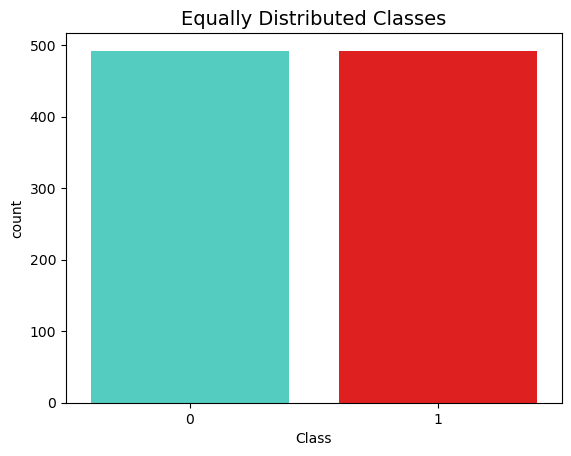

In [19]:
sns.countplot(x = 'Class', data = new_df, palette = colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


Correlation Matrix

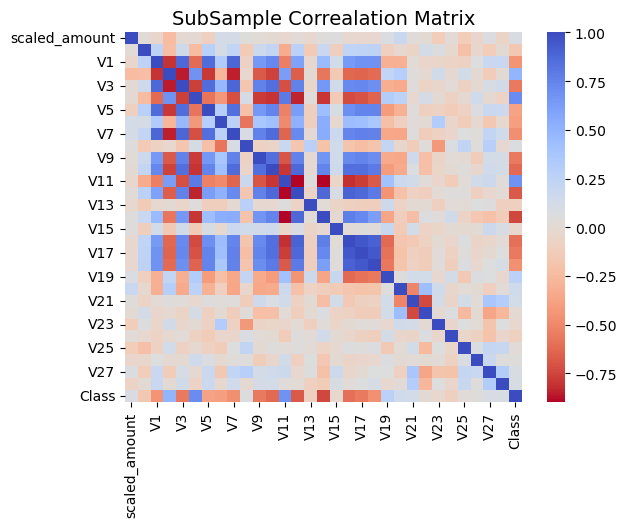

In [21]:
corr = new_df.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size':20})
plt.title('SubSample Correalation Matrix', fontsize = 14)
plt.show()

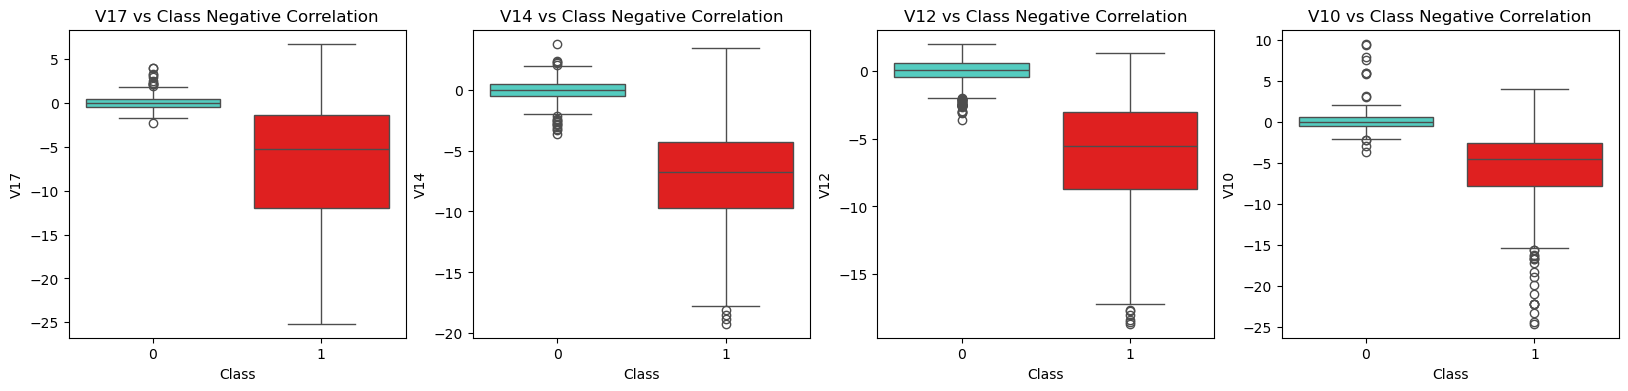

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

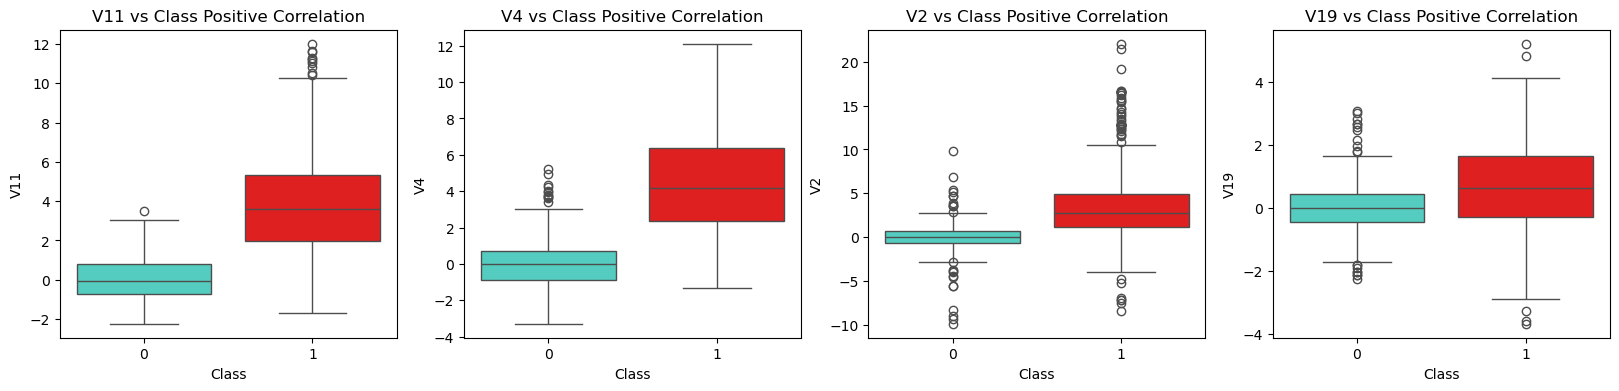

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Anomaly Detection for Removing Extreme Outliers

Text(0.5, 1.0, 'V10 Distribution \\” (Fraud Transactions)')

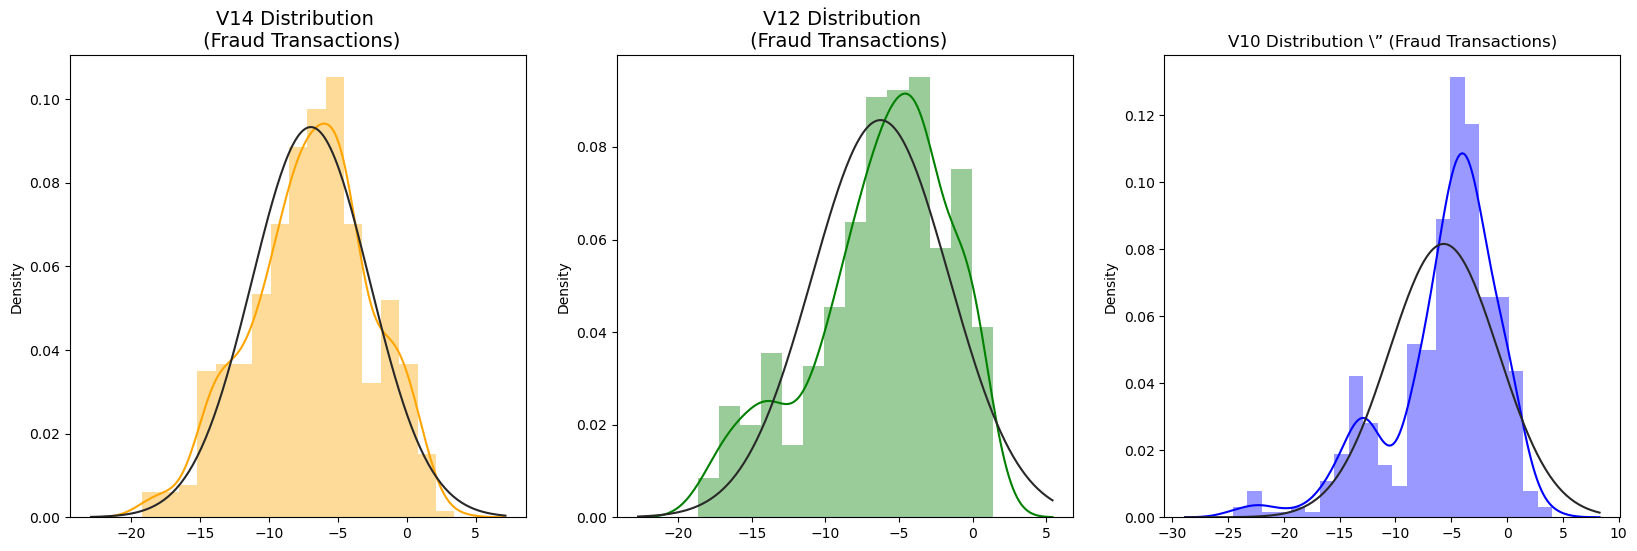

In [25]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax = ax1, fit = norm, color = 'orange')
ax1.set_title("V14 Distribution \n (Fraud Transactions)", fontsize = 14)

v12_fraud_dist = new_df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax = ax2, fit = norm, color = "green")
ax2.set_title("V12 Dİstribution \n (Fraud Transactions)", fontsize = 14)

v10_fraud_dist = new_df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax = ax3, fit = norm, color = 'blue')
ax3.set_title("V10 Distribution \” (Fraud Transactions)")

In [26]:
#Removing Outliers for V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f'Quartile 25: {q25}\nQuartile 75: {q75} ')
v14_iqr = q75- q25
print(f'IQR: {v14_iqr}')

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = (q25 - v14_cut_off), (q75 + v14_cut_off)
print(f'Cut Off: {v14_cut_off}')
print(f'V14 Lower Range: {v14_lower}')
print(f'V14 Upper Range: {v14_upper}')

v14_outliers = [x for x in v14_fraud if (x > v14_upper or x < v14_lower )]
print(f'Number of V14 Outliers: {len(v14_outliers)}')
print(f'V14 Outliers: {v14_outliers}')

new_df = new_df.drop(new_df[(new_df['V14']> v14_upper) | (new_df['V14'] < v14_lower)].index)

#Removing Outliers for V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print(f'Quartile 25: {q25}\nQuartile 75: {q75} ')
v12_iqr = q75- q25
print(f'IQR: {v12_iqr}')

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = (q25 - v12_cut_off), (q75 + v12_cut_off)
print(f'Cut Off: {v12_cut_off}')
print(f'V12 Lower Range: {v12_lower}')
print(f'V12 Upper Range: {v12_upper}')

v12_outliers = [x for x in v12_fraud if (x > v12_upper or x < v12_lower )]
print(f'Number of V12 Outliers: {len(v12_outliers)}')
print(f'V12 Outliers: {v12_outliers}')

new_df = new_df.drop(new_df[(new_df['V12']> v12_upper) | (new_df['V12'] < v12_lower)].index)

#Removing Outliers for V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print(f'Quartile 25: {q25}\nQuartile 75: {q75} ')
v10_iqr = q75- q25
print(f'IQR: {v10_iqr}')

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = (q25 - v10_cut_off), (q75 + v10_cut_off)
print(f'Cut Off: {v10_cut_off}')
print(f'V10 Lower Range: {v10_lower}')
print(f'V10 Upper Range: {v10_upper}')

v10_outliers = [x for x in v10_fraud if (x > v10_upper or x < v10_lower )]
print(f'Number of V10 Outliers: {len(v10_outliers)}')
print(f'V10 Outliers: {v10_outliers}')

new_df = new_df.drop(new_df[(new_df['V10']> v10_upper) | (new_df['V10'] < v10_lower)].index)

Quartile 25: -9.692722964972386
Quartile 75: -4.282820849486865 
IQR: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower Range: -17.807576138200666
V14 Upper Range: 3.8320323237414167
Number of V14 Outliers: 4
V14 Outliers: [-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
Quartile 25: -8.67303320439115
Quartile 75: -2.893030568676315 
IQR: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower Range: -17.3430371579634
V12 Upper Range: 5.776973384895937
Number of V12 Outliers: 4
V12 Outliers: [-18.4311310279993, -18.5536970096458, -18.0475965708216, -18.6837146333443]
Quartile 25: -7.466658535821847
Quartile 75: -2.5118611381562523 
IQR: 4.954797397665595
Cut Off: 7.432196096498393
V10 Lower Range: -14.89885463232024
V10 Upper Range: 4.92033495834214
Number of V10 Outliers: 27
V10 Outliers: [-15.1241628144947, -24.5882624372475, -15.5637913387301, -14.9246547735487, -15.1237521803455, -23.2282548357516, -24.4031849699728, -18.2711681738888, -16.7460441053

Dimensionality Reduction and Clustering

In [28]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

#T-SNE 
t0 = time.time()
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values)
t1 = time.time()
print(f'TSNE finished in: {(t1-t0):.5f}')

#PCA
t0 = time.time()
X_reduced_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values)
t1 = time.time()
print(f'PCA finished in: {(t1 - t0):.5f}')

#TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components = 2, algorithm = 'randomized' ,random_state = 42).fit_transform(X.values)
t1 = time.time()
print(f'Truncated SVD finished in: {(t1 - t0):.5f}')


TSNE finished in: 2.53551
PCA finished in: 0.00078
Truncated SVD finished in: 0.00129


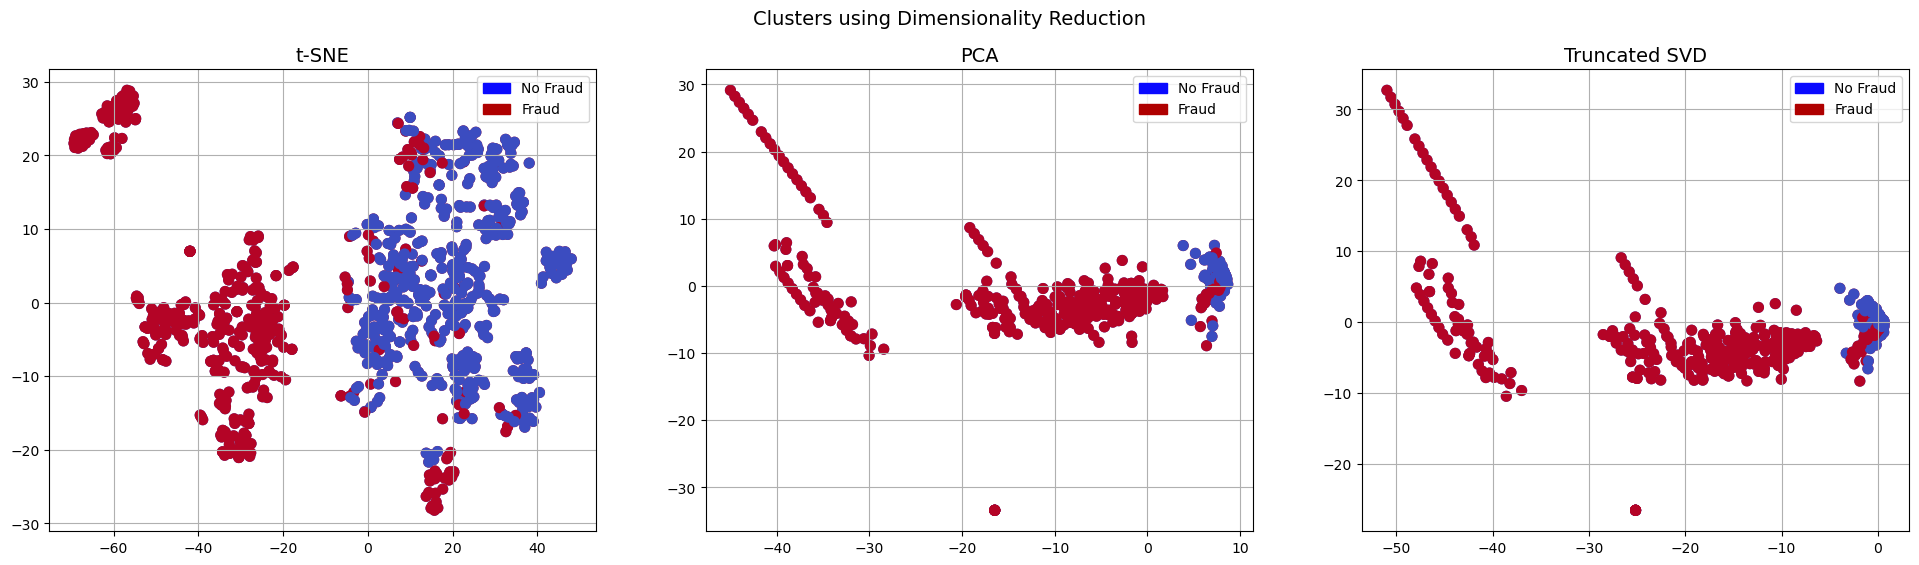

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


#t-SNE
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


#PCA 
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

#TruncatedSVD
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show()

Classifiers with Undersampling

In [31]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
#Turning the values into array so that we can feed the classification algorithms
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [34]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBoostClassifier": XGBClassifier(),
}

In [35]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print("Classifier: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(),2) * 100, "% accuracy score")

Classifier:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifier:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifier:  SVC Has a training score of 93.0 % accuracy score
Classifier:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score
Classifier:  XGBClassifier Has a training score of 93.0 % accuracy score


In [36]:
#GridSearchCV to find the best parameters

#Logistic Regression
log_reg_params = {
    "penalty": ['l1', 'l2'], 
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_log_reg.best_params_}")

#K-Nearest Neighbors
knears_params = {
    "n_neighbors": [2, 3, 4], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_
print(f"Best parameters for K-Nearest Neighbors: {grid_knears.best_params_}")

#Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_
print(f"Best parameters for Support Vector Classifier: {grid_svc.best_params_}")

#Decision Tree Classifier
dtree_params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2, 3], 
    'min_samples_leaf': [5,6]}
grid_dtree = GridSearchCV(DecisionTreeClassifier(), dtree_params)
grid_dtree.fit(X_train, y_train)
dtree_c = grid_dtree.best_estimator_ 
print(f"Best parameters for Decision Tree Classifier: {grid_dtree.best_params_}")

#XGBoost Classifier
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params)
grid_xgb.fit(X_train, y_train)
xgb = grid_xgb.best_estimator_
print(f"Best parameters for XGBoost Classifier: {grid_xgb.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best parameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 2}
Best parameters for Support Vector Classifier: {'C': 1, 'kernel': 'linear'}
Best parameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
Best parameters for XGBoost Classifier: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


In [37]:
#Overfitting
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv = 5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv = 5)
print('K-Nears Neighbors Cross Validation Score: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv = 5)
print('Support Vector Classifier Cross Validation Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')
e
dtree_c_score = cross_val_score(dtree_c, X_train, y_train, cv = 5)
print('Decision Tree Cross Validation Score: ', round(dtree_c_score.mean() * 100, 2).astype(str) + '%')

xgb_score = cross_val_score(xgb, X_train, y_train, cv = 5)
print('XGBoost Cross Validation Score: ', round(xgb_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.69%
K-Nears Neighbors Cross Validation Score:  93.89%
Support Vector Classifier Cross Validation Score:  94.42%
Decision Tree Cross Validation Score:  92.43%
XGBoost Cross Validation Score:  94.69%


In [38]:
#Undersampling during cross validation
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in skf.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

#Implementing NearMiss to see how it distributes the labels
for train_index, test_index in skf.split(undersample_X, undersample_y):
    #Train/test split
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
    #NearMiss undersampling
    nearmiss = NearMiss(sampling_strategy='majority')
    X_nearmiss, y_nearmiss = nearmiss.fit_resample(undersample_Xtrain, undersample_ytrain)
    
    #Pipeline with Logistic Regression
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), LogisticRegression())
    undersample_model = undersample_pipeline.fit(X_nearmiss, y_nearmiss)
    undersample_prediction = undersample_model.predict(undersample_Xtest)
    
    #Append the performance metrics
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtest, undersample_ytest))
    undersample_precision.append(precision_score(undersample_ytest, undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytest, undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytest, undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytest, undersample_prediction))

# Printing the performance metrics
print("Accuracy: ", np.mean(undersample_accuracy))
print("Precision: ", np.mean(undersample_precision))
print("Recall: ", np.mean(undersample_recall))
print("F1 Score: ", np.mean(undersample_f1))
print("AUC: ", np.mean(undersample_auc))

Train: [ 46633  47767  48220 ... 284804 284805 284806] Test: [    0     1     2 ... 56973 56974 56975]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 46633  47767  48220 ... 113925 113926 113927]
Train: [     0      1      2 ... 284804 284805 284806] Test: [111740 112616 113413 ... 171849 172046 172624]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170881 170882 170883 ... 227844 227845 227846]
Train: [     0      1      2 ... 227844 227845 227846] Test: [227157 227847 227848 ... 284804 284805 284806]
Accuracy:  0.6592851353642792
Precision:  0.004794726803906328
Recall:  0.9247371675943106
F1 Score:  0.00953822751454294
AUC:  0.7917813829811589


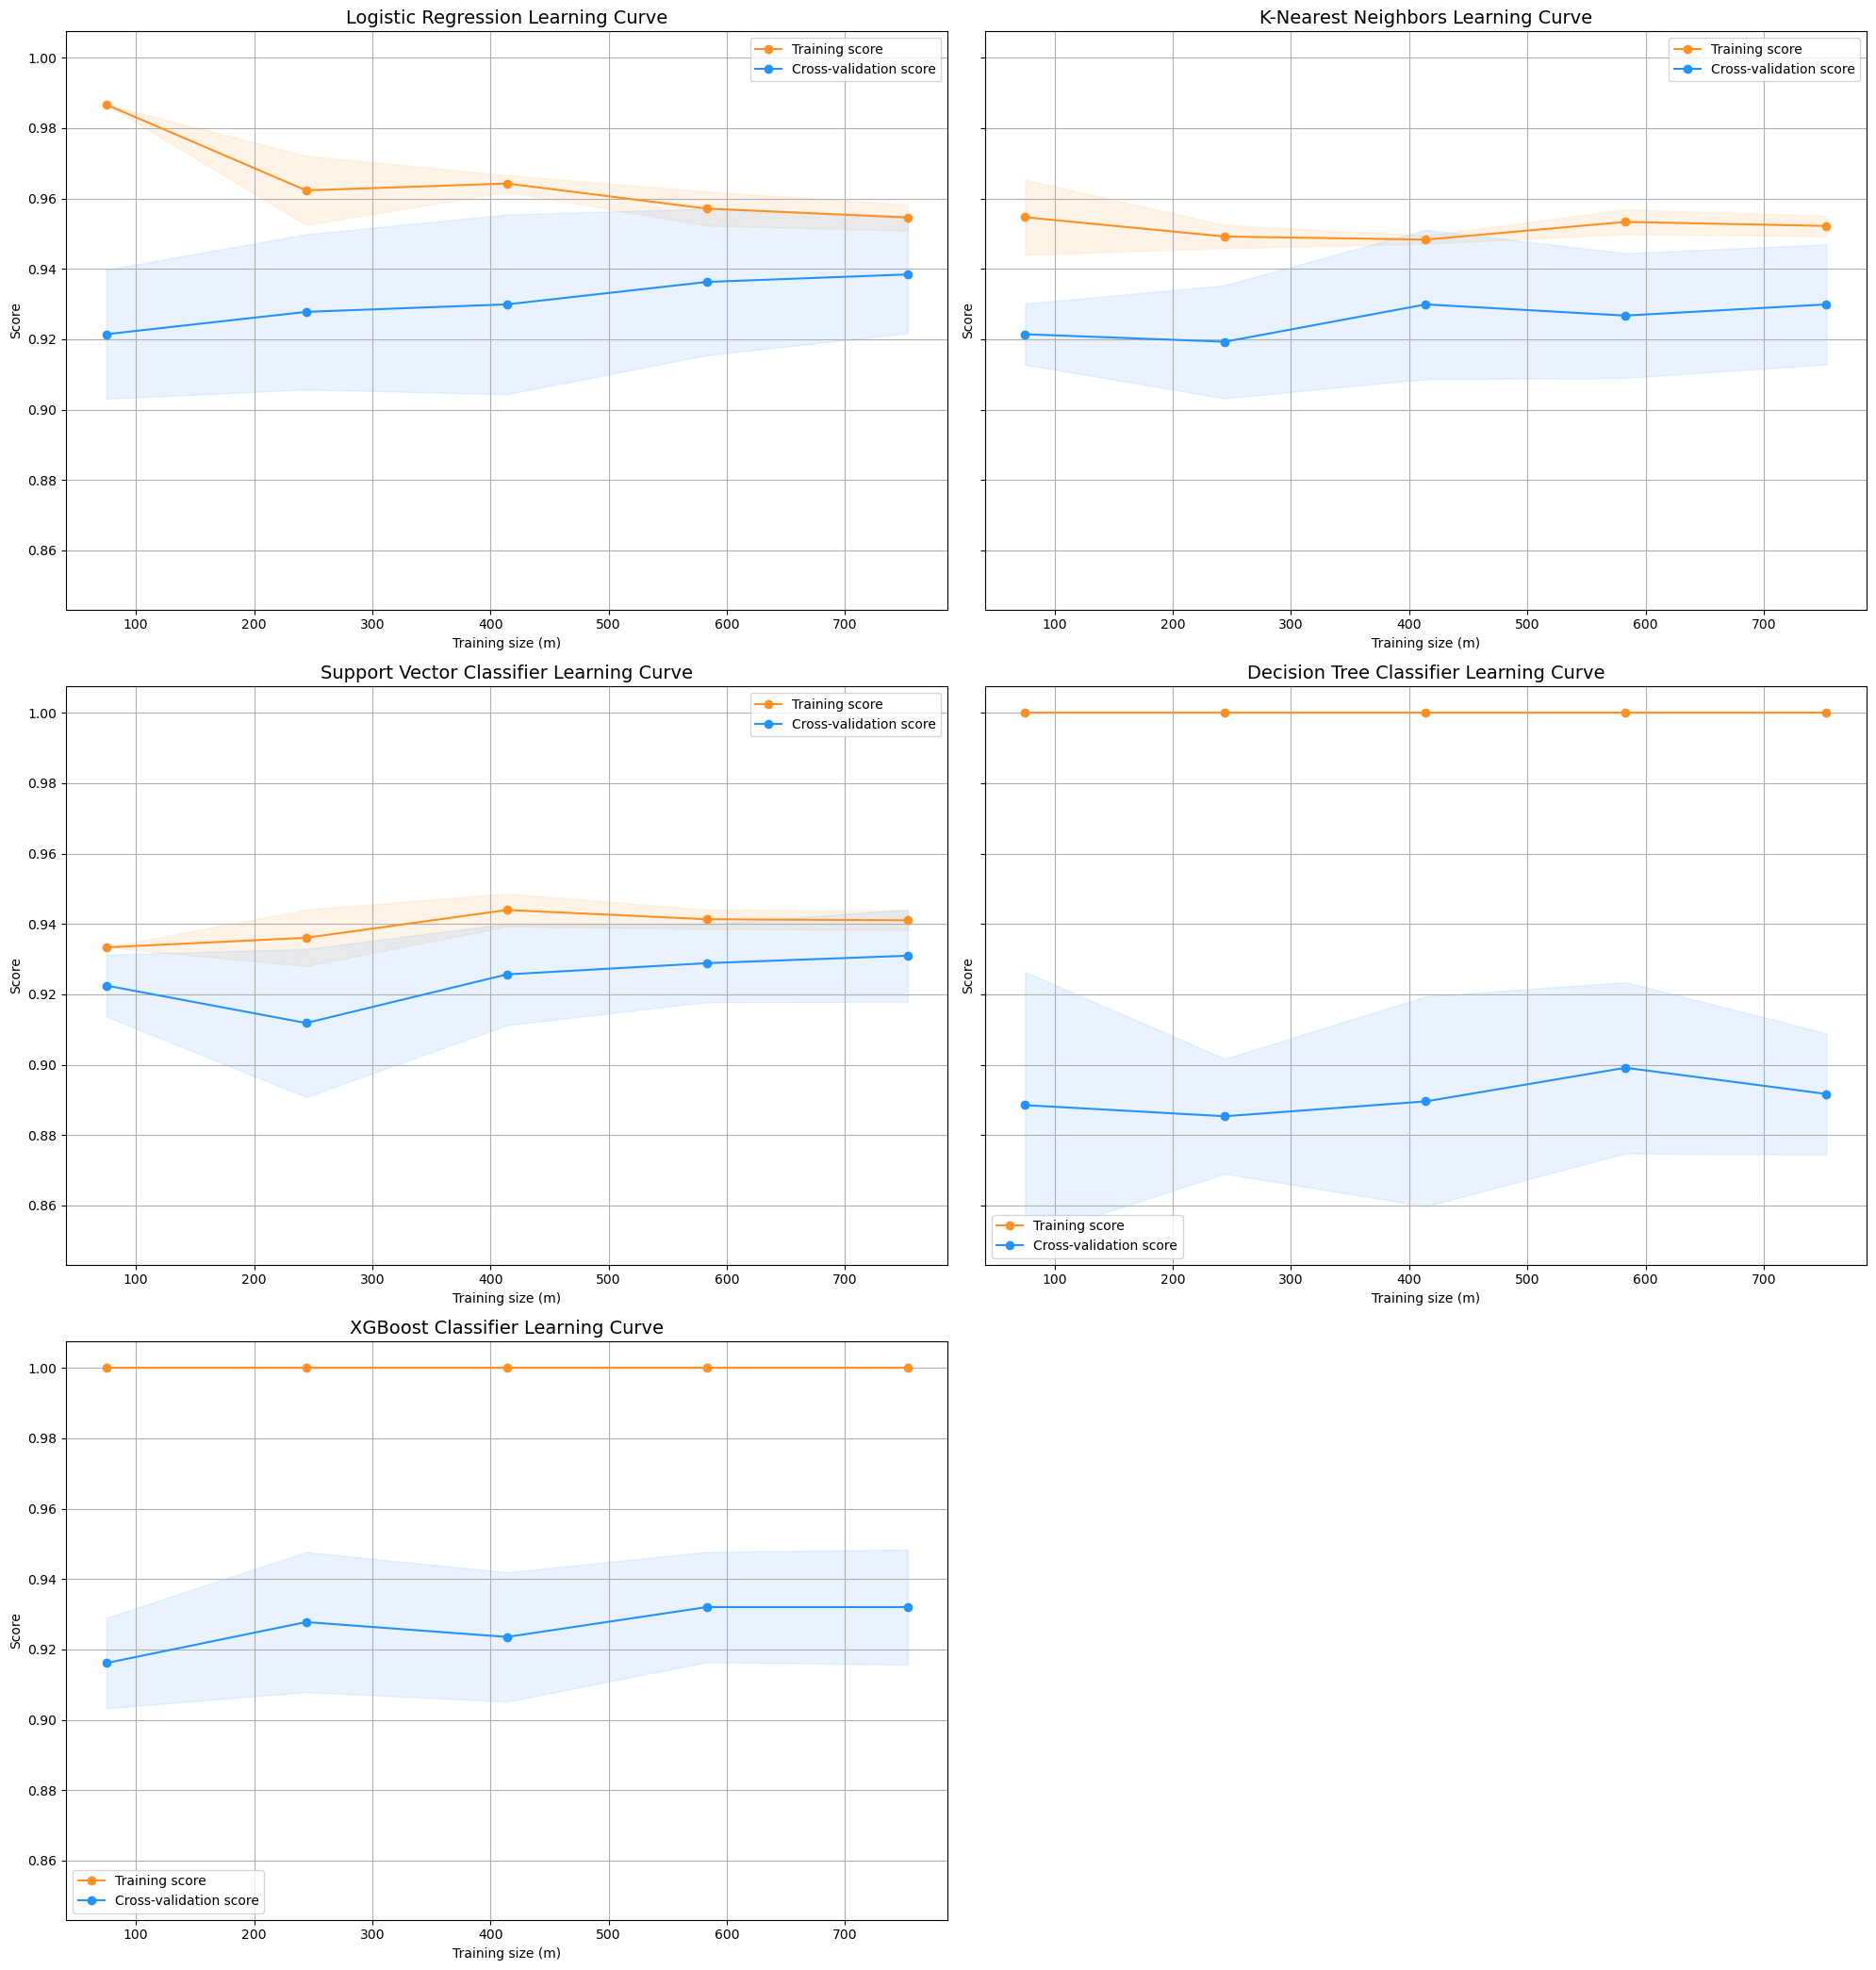

In [73]:
def plot_learning_curve(estimators, titles, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, axes = plt.subplots(3, 2, figsize=(20, 21), sharey=True)
    axes = axes.ravel()
    if ylim is not None:
        plt.ylim(*ylim)
    
    for ax, estimator, title in zip(axes, estimators, titles):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="#ff9124")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
                label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
                label="Cross-validation score")
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Training size (m)')
        ax.set_ylabel('Score')
        ax.grid(True)
        ax.legend(loc="best")
    
    
    if len(estimators) % 2 != 0:
        f.delaxes(axes[-1])
    
    plt.tight_layout()
    return plt

cv = StratifiedKFold(n_splits=5)

estimators = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

titles = [
    "Logistic Regression Learning Curve",
    "K-Nearest Neighbors Learning Curve",
    "Support Vector Classifier Learning Curve",
    "Decision Tree Classifier Learning Curve",
    "XGBoost Classifier Learning Curve"
]

plot = plot_learning_curve(estimators, titles, X, y, cv=cv)
plot.show()

<module 'matplotlib.pyplot' from '/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/matplotlib/pyplot.py'>

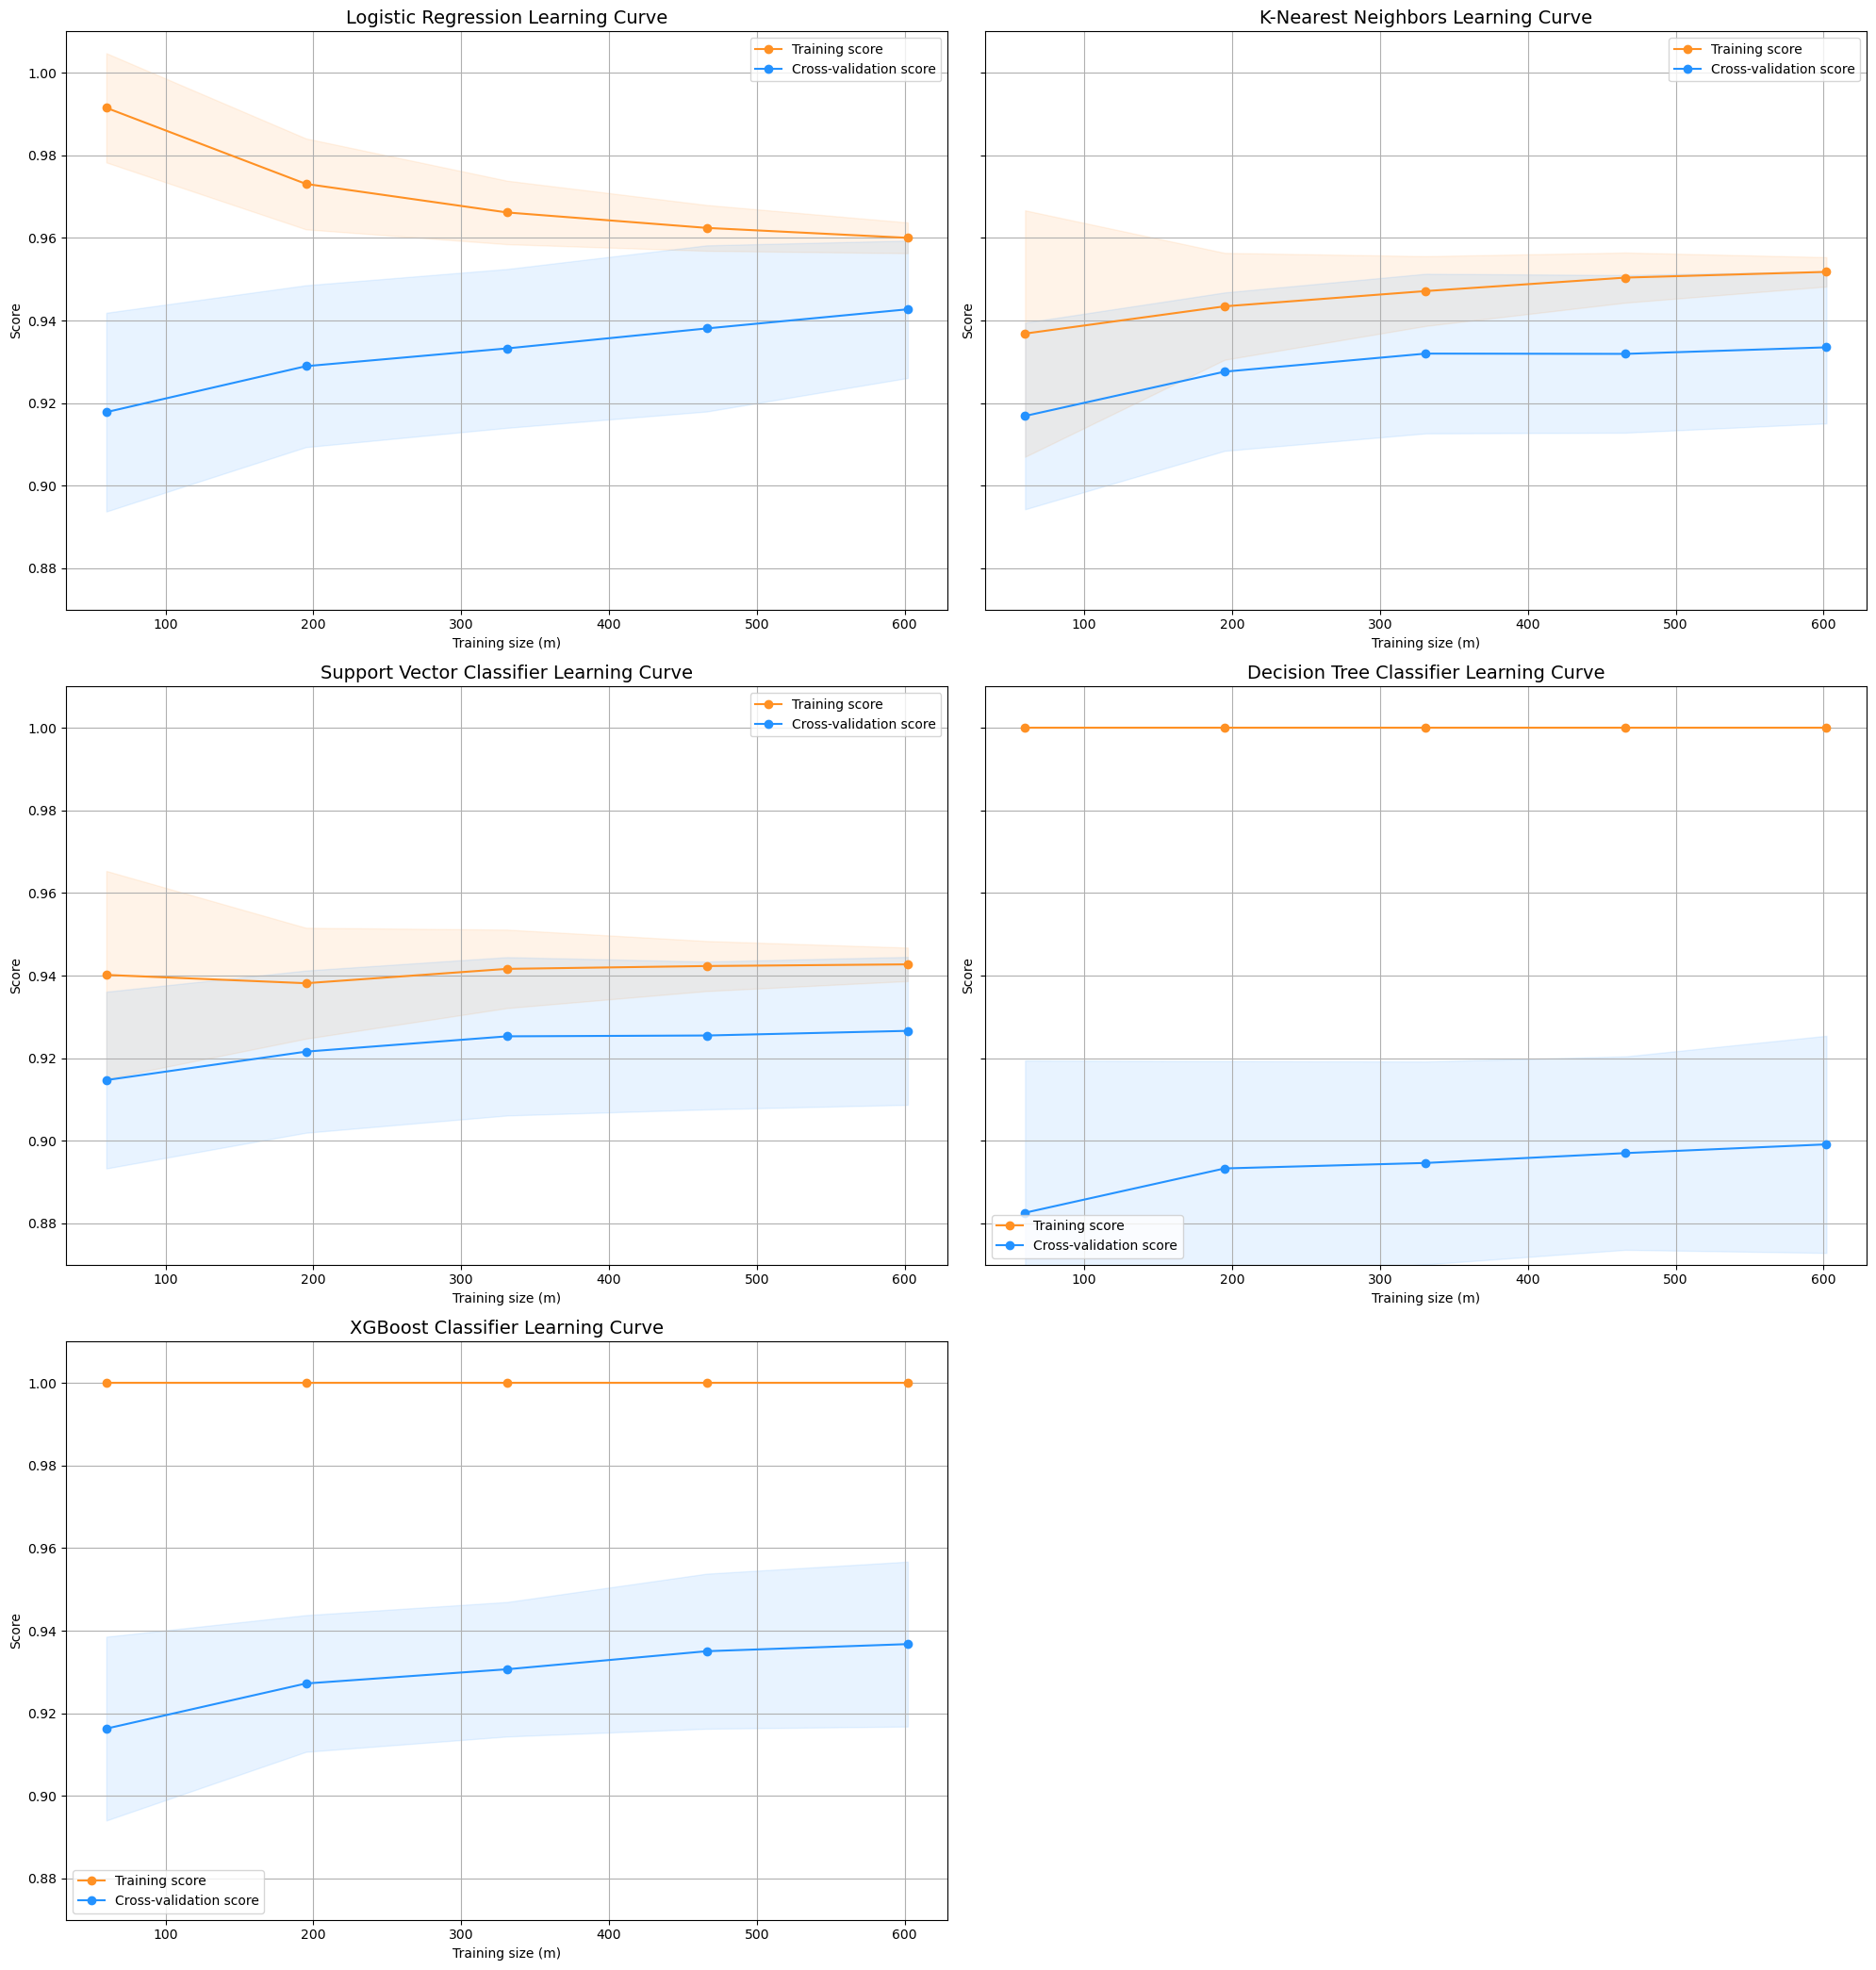

In [75]:
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 42)
plot_learning_curve(estimators, titles, X_train, y_train, (0.87, 1.01), cv = cv, n_jobs = 4)

In [83]:
from sklearn.model_selection import cross_val_predict
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv = 5, method = "decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv = 5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method = "decision_function")
dtree_c_pred = cross_val_predict(dtree_c, X_train, y_train, cv = 5)
xgb_pred = cross_val_predict(xgb, X_train, y_train, cv = 5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, dtree_c_pred))
print('XGBoost Classifier: ', roc_auc_score(y_train, xgb_pred))

Logistic Regression:  0.98019031998077
KNears Neighbors:  0.9363043140138286
Support Vector Classifier:  0.9740537024730286
Decision Tree Classifier:  0.9227160895324011
XGBoost Classifier:  0.945032026356348


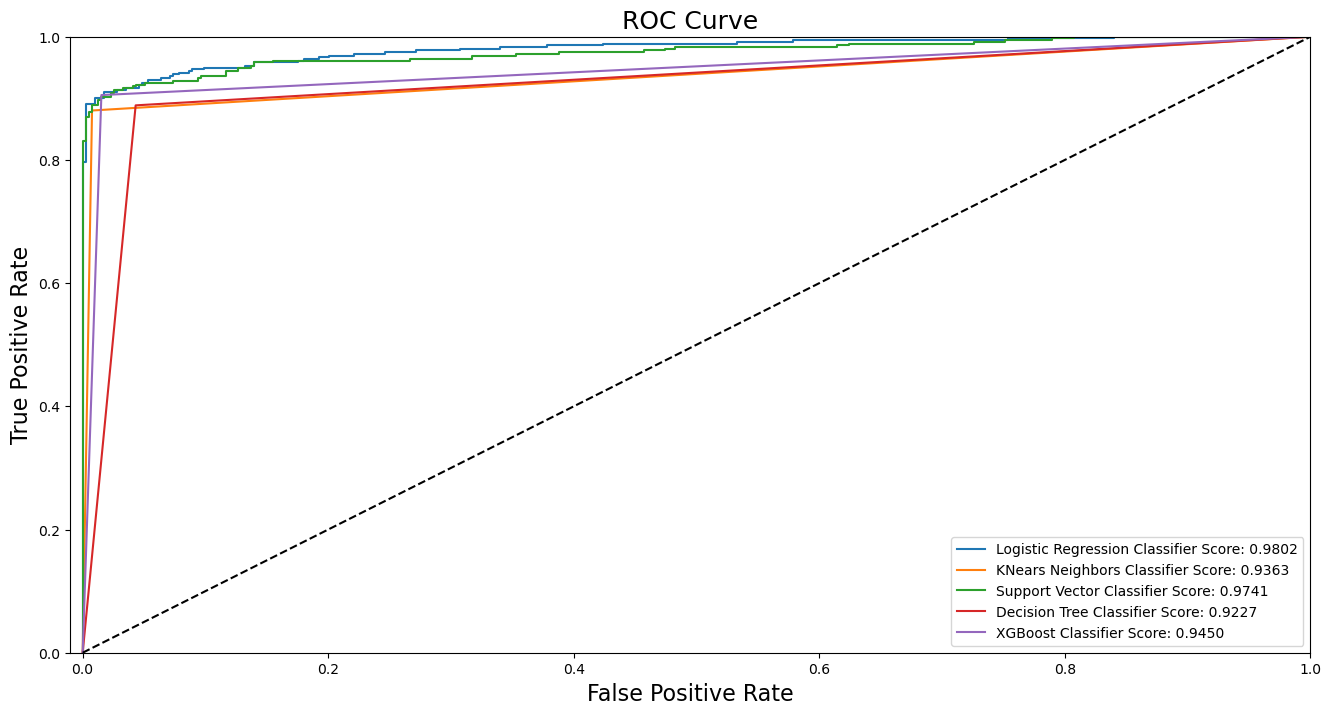

In [93]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
dtree_c_fpr, dtree_c_tpr, dtree_c_threshold = roc_curve(y_train, dtree_c_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, xgb_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, dtree_c_fpr, dtree_c_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(dtree_c_fpr, dtree_c_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dtree_c_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, xgb_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, dtree_c_fpr, dtree_c_tpr, xgb_fpr, xgb_tpr)
plt.show()

Logistic Regression